In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
color_df = pd.read_csv('data/colors.csv')

In [3]:
color_df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [4]:
color_df.nunique()

id          135
name        135
rgb         124
is_trans      2
dtype: int64

In [5]:
color_df['is_trans'].value_counts()

f    107
t     28
Name: is_trans, dtype: int64

In [6]:
color_df.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [7]:
color_df.count()

id          135
name        135
rgb         135
is_trans    135
dtype: int64

<h6>Finding the Oldest and Largest LEGO Sets<h6>

In [8]:
sets_df = pd.read_csv('data/sets.csv')

In [9]:
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [10]:
sorted_sets_df =  sets_df.sort_values('year')

In [11]:
sorted_sets_df[sorted_sets_df['year'] == 1949].year.value_counts()

1949    5
Name: year, dtype: int64

In [12]:
sorted_sets_df.head(15)

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
9526,700.1.2-1,Single 2 x 2 Brick (ABB),1950,371,1
9546,700.B.1-1,Single 1 x 4 x 2 Window without Glass (ABB),1950,371,1
9523,700.1.1-1,Single 2 x 4 Brick (ABB),1950,371,1
9548,700.B.3-1,Single 1 x 2 x 2 Window without Glass (ABB),1950,371,1
9549,700.B.4-1,Single 1 x 2 x 4 Door without Glass (ABB),1950,371,1


In [13]:
sorted_sets_df.tail(15)

,set_num,name,year,theme_id,num_parts
13572,88014-1,Technic XL Motor,2020,1,1
11264,75263-1,Resistance Y-wing Microfighter,2020,158,86
11265,75264-1,Kylo Ren's Shuttle Microfighter,2020,158,72
11266,75265-1,T-16 Skyhopper vs. Bantha Microfighters,2020,158,198
11267,75266-1,Sith Troopers Battle Pack,2020,158,105
11268,75267-1,Mandalorian Battle Pack,2020,158,109
11269,75268-1,Snowspeeder,2020,158,91
11270,75269-1,Duel on Mustafar,2020,158,208
11271,75270-1,Obi-Wan's Hut,2020,158,200
11273,75271-1,Luke Skywalker's Landspeeder,2020,158,236


In [14]:
print(f"First Lego set was released on {sorted_sets_df['year'][1]}")

First Lego set was released on 1978


In [15]:
type(sorted_sets_df['year'][0])

numpy.int64

In [16]:
count = 0

for num in sorted_sets_df.year:
    if num == 1949:
        count += 1

print(count)

5


In [17]:
sets_df.sort_values('num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


<h6>Visualise the Number of Sets Published over Time<h6>

In [18]:
set_by_year = sets_df.groupby('year').count()

In [19]:
set_by_year.set_num.head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

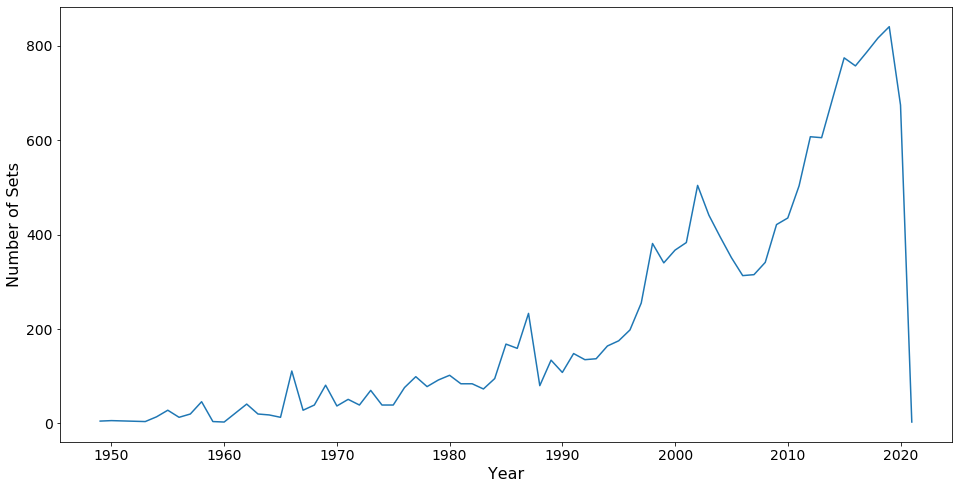

In [20]:
plt.figure(figsize=(16,8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Sets', fontsize=16)

plt.plot(set_by_year.index, set_by_year.set_num)


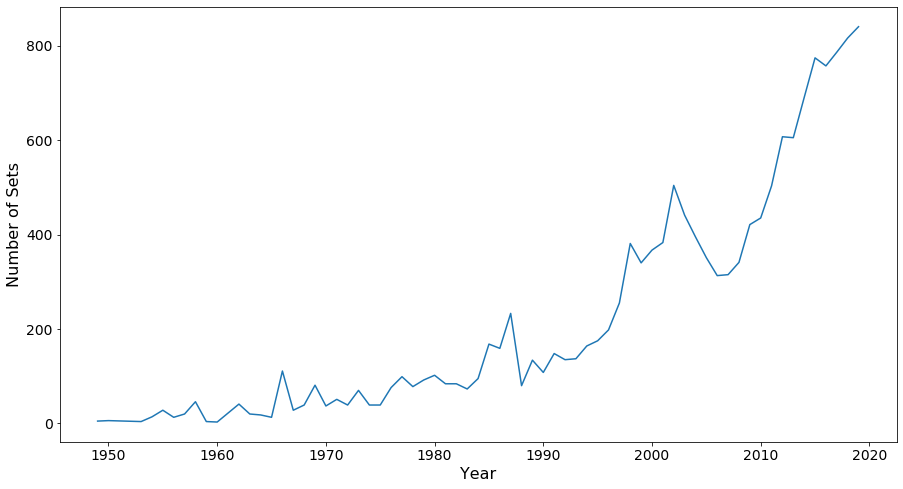

In [21]:
plt.figure(figsize=(15,8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Sets', fontsize=16)
plt.plot(set_by_year.index[:-2], set_by_year.set_num[:-2])

<h6>Number of Themes per Calendar Year<h6>

In [22]:
themes_by_year = sets_df.groupby('year').agg({'theme_id': pd.Series.nunique})
themes_by_year.head()

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [23]:
themes_by_year.rename(columns = {'theme_id': 'theme_number'}, inplace=True)
themes_by_year.head()

,theme_number
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [24]:
themes_by_year.tail()

,theme_number
year,
2017,89
2018,93
2019,78
2020,82
2021,1


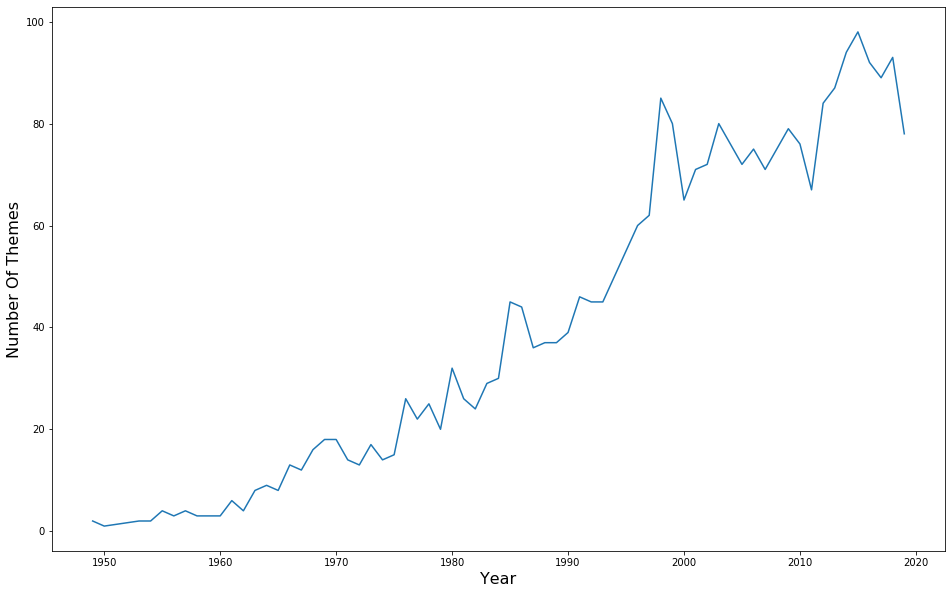

In [26]:
plt.figure(figsize=(16,10))
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number Of Themes', fontsize=16)

plt.plot(themes_by_year.index[:-2], themes_by_year.theme_number[:-2])

In [29]:
set_by_year.num_parts.head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: num_parts, dtype: int64

In [28]:
themes_by_year.head()

,theme_number
year,
1949,2
1950,1
1953,2
1954,2
1955,4


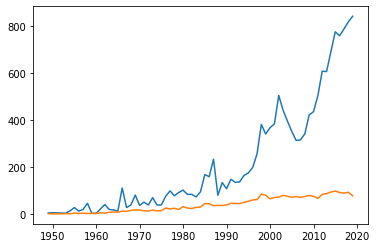

In [32]:
plt.plot(set_by_year.index[:-2], set_by_year.num_parts[:-2], themes_by_year.index[:-2], themes_by_year.theme_number[:-2])

Text(0, 0.5, 'Number Of Themes')

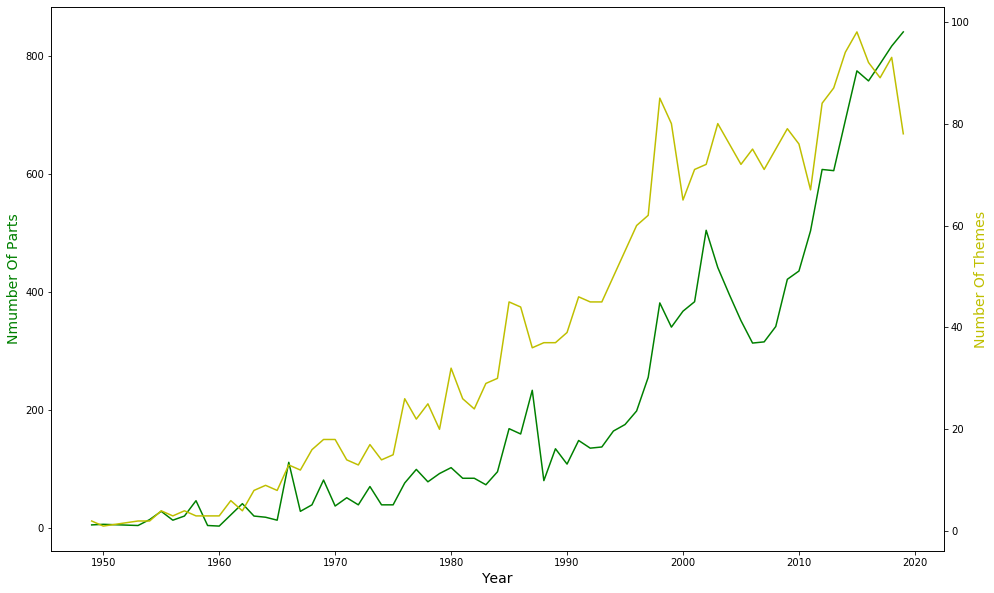

In [36]:
plt.figure(figsize=(16,10))

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(set_by_year.index[:-2], set_by_year.num_parts[:-2], color='g')
ax2.plot(themes_by_year.index[:-2], themes_by_year.theme_number[:-2], color='y')

ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Nmumber Of Parts', fontsize=14, color='g')
ax2.set_ylabel('Number Of Themes', fontsize=14, color='y')